## Defining general function to plot the graph (Taken from lectures)

In [1]:
import matplotlib.pyplot as plt #importing plotting module
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score

#y=Validation/test labels;z = prediction scores
def plotROC(y,z,pstr=''):
    #fpr=false positive rate;tpr = true positive rate;tt = threshold 
    fpr,tpr,tt=roc_curve(y,z)
    #Find area under the curve for ROC
    roc_auc = auc(fpr,tpr)
    plt.figure()
    plt.plot(tt,fpr,'o--',tt,tpr,'x--');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(fpr,tpr,'o--');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

#y=Validation/test labels;z = prediction scores
def plotPRC(y,z,pstr=''):
    P, R, tt = precision_recall_curve(y,z)
    pr_auc = average_precision_score(y,z)
    plt.figure()
    plt.plot(tt,R[:-1],'o--',tt,P[:-1],'x--');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o--');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

In [2]:
import numpy as np

# Importing the dataset as numpy arrays
#Xtraindata = Training dataset;Xtestdata=Testing dataset;Ytraindata= training labels
Xtraindata = np.loadtxt(r"C:/Users/harsh/Downloads/Warwick/Data mining/Assignment 1/Xtrain.csv")
Xtestdata = np.loadtxt(r"C:/Users/harsh/Downloads/Warwick/Data mining/Assignment 1/Xtest.csv")
Ytraindata = np.loadtxt(r"C:/Users/harsh/Downloads/Warwick/Data mining/Assignment 1/Ytrain.csv")

## Question No. 1: (Showing data)
## i. How many training and test examples are there? You can use np.loadtxt for this purpose. Show at least 10 randomly selected objects of each class using plt.matshow.

In [3]:
num_rows_train, num_cols_test = Xtraindata.shape
print("Number of training samples: " + str(num_rows_train))
num_rows_test, num_cols_test = Xtestdata.shape
print("Number of test samples: " + str(num_rows_test))

Number of training samples: 3000
Number of test samples: 3000


Positive random samples


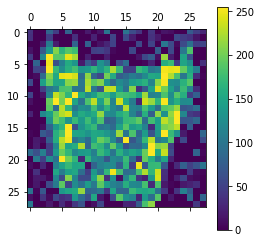

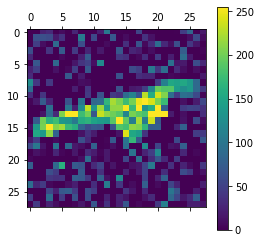

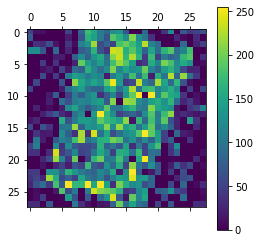

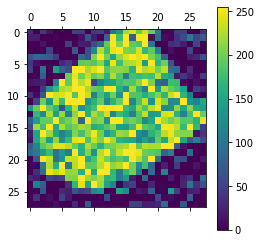

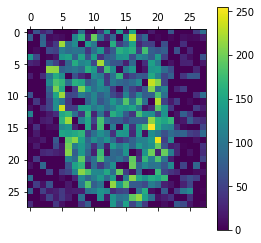

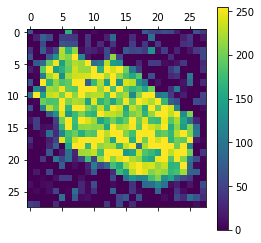

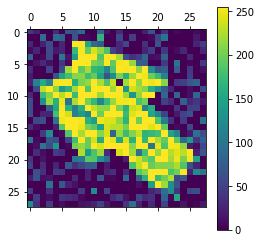

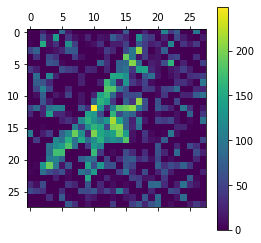

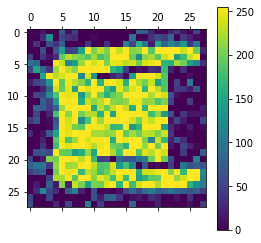

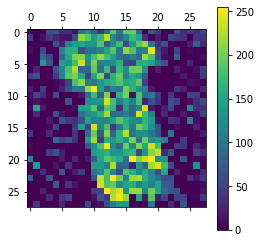

In [4]:
#Printing randomly selected objects of Positive class
import random
import matplotlib.pyplot as plt

#To store the randomly selected indices values
list_of_indices = []
#A counter to count 10 objects whose label is positive
count_pos = 0

print("Positive random samples")
while(count_pos != 10):
    index = random.randint(0,2999)
    if index not in list_of_indices:
        if(Ytraindata[index] == 1):
            org_vec = Xtraindata[index]
            plt.matshow(np.reshape(org_vec, (28, 28)))
            plt.colorbar()
            count_pos = count_pos + 1   
    else:
        continue
    list_of_indices.append(index)

Negative random samples


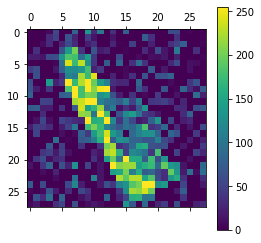

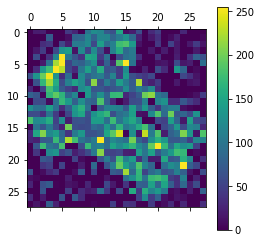

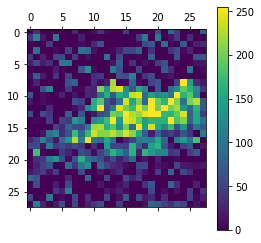

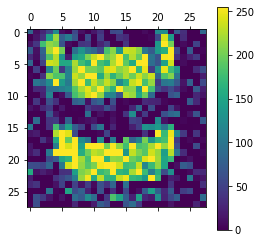

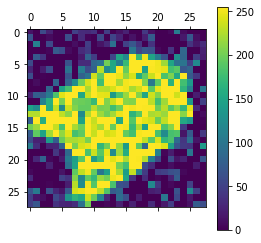

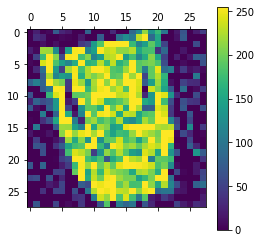

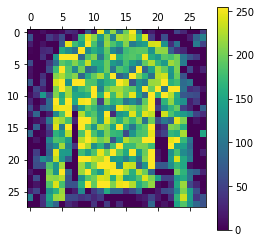

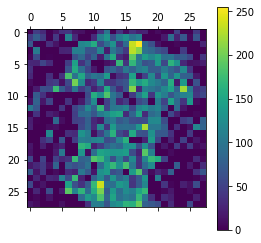

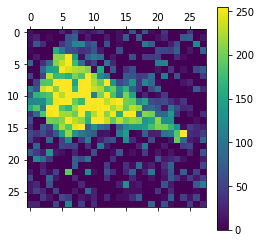

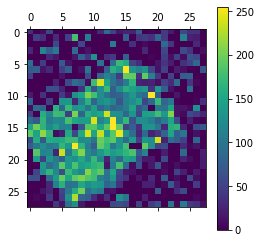

In [5]:
#Printing randomly selected objects of Negative class
#A counter to count 10 objects whose label is negative
count_neg = 0
print("Negative random samples")
    
while(count_neg != 10):
    index = random.randint(0,2999)
    if index not in list_of_indices:
        if(Ytraindata[index] == -1):
            org_vec = Xtraindata[index]
            plt.matshow(np.reshape(org_vec, (28, 28)))
            plt.colorbar()
            count_neg = count_neg + 1   
    else:
        continue
    list_of_indices.append(index)

## ii. How many positive and negative examples are there in the training dataset?

In [6]:
count_positive = np.count_nonzero(Ytraindata == 1)
print("The number of positive samples: " + str(count_positive))
count_negative = np.count_nonzero(Ytraindata == -1)
print("The number of negative samples: " +str(count_negative))

The number of positive samples: 2118
The number of negative samples: 882


## iii. Which performance metric (accuracy, AUC-ROC and AUC-PR) should be used? Give your reasoning.

In [7]:
# We cannot choose accuracy as a performance metric since it works on assumptions such as:
# 1. The dataset is balanced
# 2. Misclassification of any class is equally bad
# 3. The threshold used for classification is optimal
# Clearly our dataset is imbalanced and the first assumption it self fails. Hence we cannot use Accuracy as a metric. 

# AUC-PR cannot be used because when we look at the Precision and Recall formulas, it clearly gives more importance to positive
# samples i.e it has a higher ability to predict the positive label when compared to negative class and in our case since 
# there are majority of positive class there is a possibility that it would totally ignore the negative class which can happen
# in our dataset.

# AUC-ROC is the best metric for this case since it is a plot of TPR vs FPR and gives equal importance to both negative 
# and positive and positive classes and there is not biasing involved.

## iv. What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate why this would be the case.
## v. What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate why this would be the case.

In [8]:
# Accuracy of a random classifier is 1/p, where p is number of class labels and in our case p = 2 hence the accuracy of a 
# random classifier will be 0.5 = 50%.
# But the above is true when the we have a balanced dataset, so the accuracy has a different formula:
# accuracy = P(class=0) * P(prediction=0) + P(class=1) * P(prediction=1); where P is probabilities
# accuracy = 0.706 * 0.706 + 0.294 * 0.294
# accuracy = 0.584872
# accuracy = 58.48%

In [9]:
# Let's calculate the AUC of a random classifier on a dataset with a class imbalance.

# Assuming that there is a fraction x of positive labels and a fraction (1−x) of negative labels, 
# Our classifier consists of randomly assigning the positive class with probability ρ 
# and the negative class with probability 1−ρ. 

# The confusion matrix of a random classifier will have the following:

$$ TP=ρx $$
$$ FP=ρ(1−x)$$
$$ FN=(1−ρ)x$$
$$ TN=(1−ρ)(1−x)$$

In [10]:
# Then we calculate the True Positive Rate (sensitivity) and False Positive Rate (1-specificity) of our random classifier:

$$ TPR= \frac {TP}{TP+FN} = \frac {ρx}{ρx+(1−ρ)x}=ρ $$
$$ FPR= \frac {FP}{TT+FP} = \frac {ρ(1-x)}{ρ(1-x)+(1−ρ)(1-x)}=ρ $$


In [11]:
# So as we can see TPR and FPR do not depend on the class proportion x, 
# which means that the ROC-AUC will also be independent of x.
# Moreover TPR=FPR, meaning that the ROC-curve will look like a straight line from (0,0) to (1,1). 

# Now if we calculate the AUC as the integral between 0 and 1 of the area under TPR as a function of FPR as we vary the threshold ρ.
# So after calculations, we get the area under the ROC curve for a random classifier to be 0.5 regardless of the class proportion.

$$
  \int_0^1 {ρ}\,dρ = \frac{1}{2}
$$

In [12]:
# AUC-ROC of a random classifier will be 0.5

# A random classifier has an AUC-PR close to 0.5. It basically lies in the range of [0.5, 0.1]
# This is easy to understand: for every correct prediction, the next prediction will be incorrect.

## Question No. 2: (Nearest Neighbor Classifier)
## Perform 5-fold stratified cross-validation over the training dataset using the k = 1 nearest neighbour classifier and answer the following questions:

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

#Initializing the model with k = 1
sknn = KNeighborsClassifier(n_neighbors=1)
#Initialising the startified k-fold CV with 5 folds
skf = StratifiedKFold(n_splits=5)
#Lists to hold, Accuracy, AUC-ROC, AUC-PR for all the 5 folds
accuracy_stratified = []
roc_auc_stratified = []
pr_auc_stratified = []

## i. What is the prediction accuracy, AUC-ROC and AUC-PR for each fold using this classifier?Show code to demonstrate the results

Fold  0 Accuracy: 0.74
Fold  0 AUC ROC: 0.708029588336192
Fold  0 AUC PR: 0.80877887867008
Fold  1 Accuracy: 0.76
Fold  1 AUC ROC: 0.7321505145797599
Fold  1 AUC PR: 0.8226719288265225
Fold  2 Accuracy: 0.74
Fold  2 AUC ROC: 0.7130145797598627
Fold  2 AUC PR: 0.8118697856501091
Fold  3 Accuracy: 0.7383333333333333
Fold  3 AUC ROC: 0.712565612854109
Fold  3 AUC PR: 0.8104761471782749
Fold  4 Accuracy: 0.755
Fold  4 AUC ROC: 0.7293144208037826
Fold  4 AUC PR: 0.8200355209945879


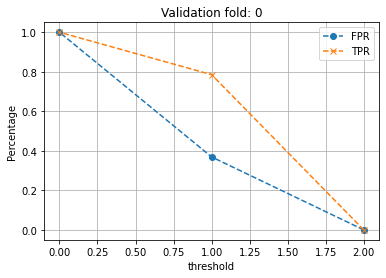

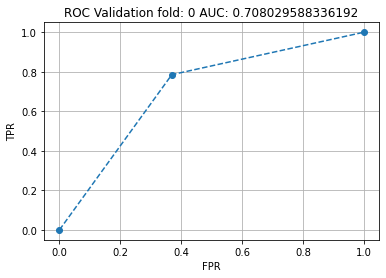

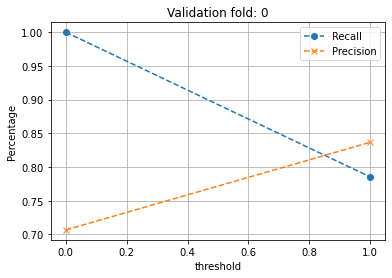

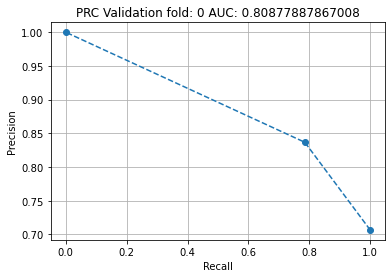

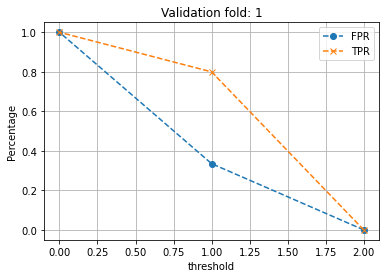

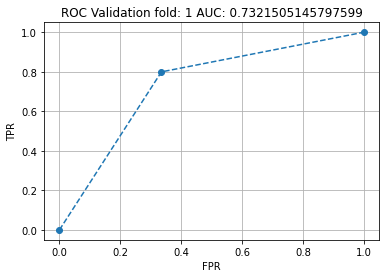

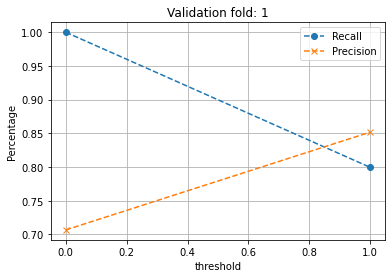

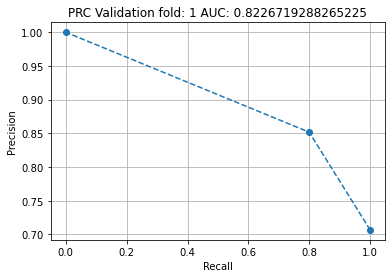

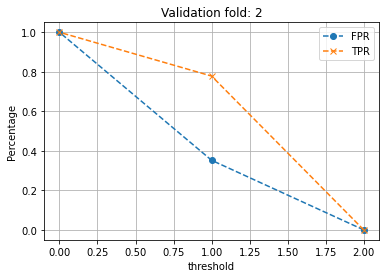

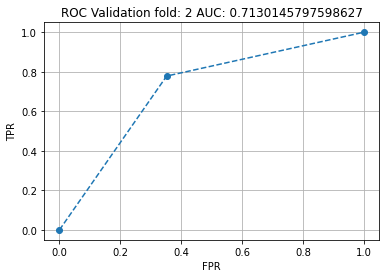

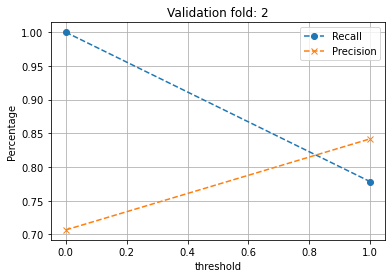

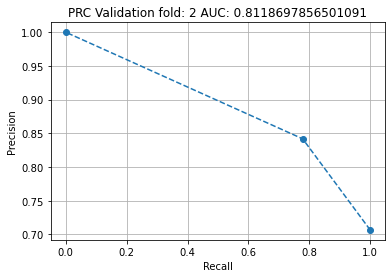

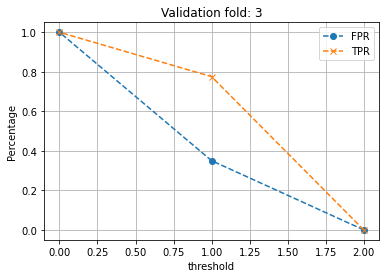

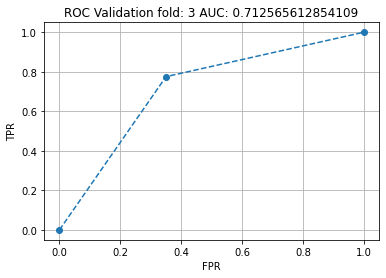

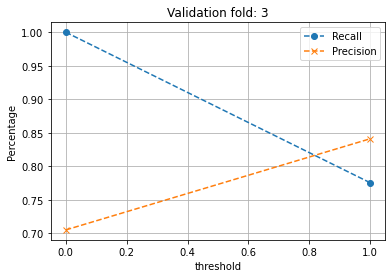

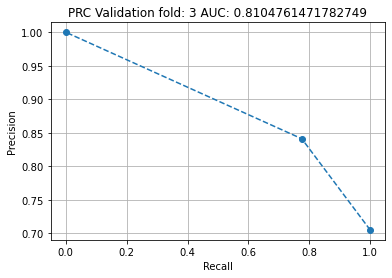

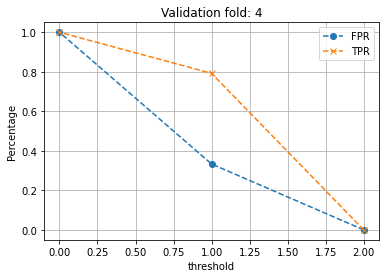

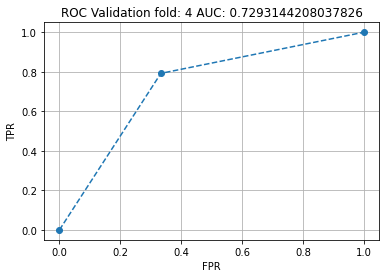

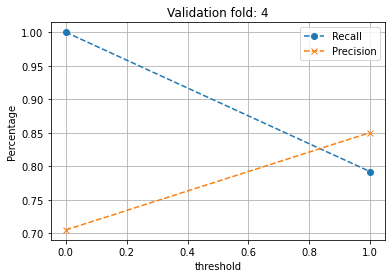

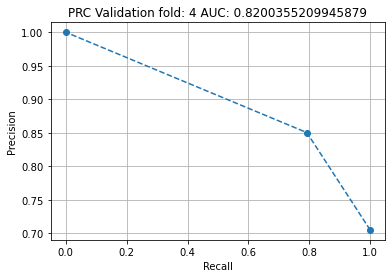

In [14]:
# X : Training data and Y : Is the training labels
# Function to return the Accuracy, AUC-ROC, AUC-PR values in the form of list for all folds
def modeloutputmetrics(X,y):
    for i, (tr_idx, v_idx) in enumerate(skf.split(X, y)):
        Xtr, Xv = X[tr_idx], X[v_idx]
        ytr, yv = y[tr_idx], y[v_idx]
        #Fit the model
        sknn.fit(Xtr, ytr)
        #Finding the score
        score_knn = sknn.score(Xv,yv)
        accuracy_stratified.append(score_knn)
        print('Fold ',i,'Accuracy:',score_knn)
        #Predicting the scores on the validation set
        z = sknn.predict_proba(Xv)[:,1]
        #Plotting AUC-ROC curve
        roc_auc = plotROC(yv,z,pstr='Validation fold: ' + str(i))
        roc_auc_stratified.append(roc_auc)
        print('Fold ',i,'AUC ROC:',roc_auc)
        #Plotting AUC-PR curves
        pr_auc = plotPRC(yv,z,pstr='Validation fold: ' + str(i))
        pr_auc_stratified.append(pr_auc)
        print('Fold ',i,'AUC PR:',pr_auc)
    return accuracy_stratified,roc_auc_stratified,pr_auc_stratified

# Calculating the Accuracy, AUC-ROC, AUC-PR values
acc,roc,pr = modeloutputmetrics(Xtraindata,Ytraindata)

## ii. What is the mean and standard deviation of each performance metric (accuracy, AUC-ROC and AUC-PR)across all the folds for this classifier? Show code to demonstrate the results.

In [15]:
# Calculating the mean and standard deviation for all the performance metrics across folds
print('The mean of accuracies across all folds is: ' + str(np.mean(acc)*100) + '%')
print('The standard deviation of accuracies across all folds is: ' + str(np.std(acc)))
print('The mean of AUC-ROC across all folds is: ' + str(np.mean(roc)))
print('The standard deviation of AUC-ROC across all folds is: ' + str(np.std(roc)))
print('The mean of AUC-PR across all folds is: ' + str(np.mean(pr)))
print('The standard deviation of AUC-PR across all folds is: ' + str(np.std(pr)))

The mean of accuracies across all folds is: 74.66666666666667%
The standard deviation of accuracies across all folds is: 0.009006170724070879
The mean of AUC-ROC across all folds is: 0.7190149432667412
The standard deviation of AUC-ROC across all folds is: 0.009766255364176621
The mean of AUC-PR across all folds is: 0.8147664522639149
The standard deviation of AUC-PR across all folds is: 0.005530064696031833


## iii. What is the impact of various forms of pre-processing on the cross-validation performance? Show code to demonstrate the results.

Fold  0 Accuracy: 0.7316666666666667
Fold  0 AUC ROC: 0.6971483704974272
Fold  0 AUC PR: 0.8026155010166927
Fold  1 Accuracy: 0.76
Fold  1 AUC ROC: 0.7288271869639793
Fold  1 AUC PR: 0.8205413967896367
Fold  2 Accuracy: 0.76
Fold  2 AUC ROC: 0.7271655231560892
Fold  2 AUC PR: 0.8194847126222057
Fold  3 Accuracy: 0.74
Fold  3 AUC ROC: 0.7038906919902232
Fold  3 AUC PR: 0.8049975068780834
Fold  4 Accuracy: 0.7333333333333333
Fold  4 AUC ROC: 0.6991625596025163
Fold  4 AUC PR: 0.802479840262595
The mean of accuracies across all folds is: 74.58333333333333%
The standard deviation of accuracies across all folds is: 0.010960788698304932
The mean of AUC-ROC across all folds is: 71.5126904854394
The standard deviation of AUC-ROC across all folds is: 0.012607337108374068
The mean of AUC-PR across all folds is: 81.23951218888787
The standard deviation of AUC-PR across all folds is: 0.0073913916819113995


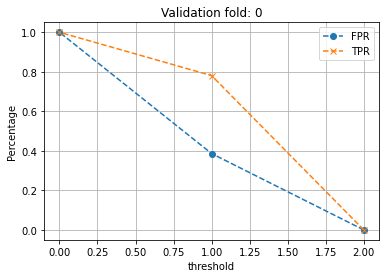

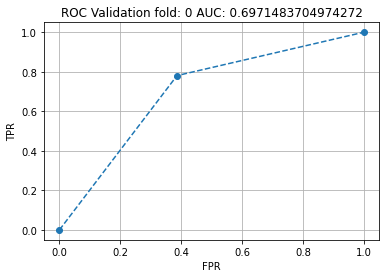

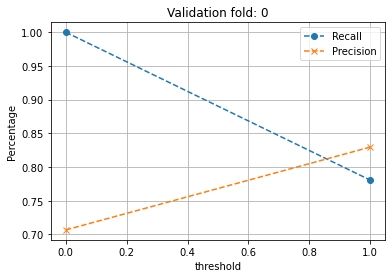

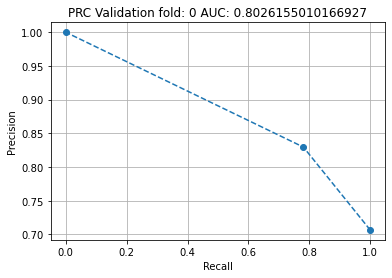

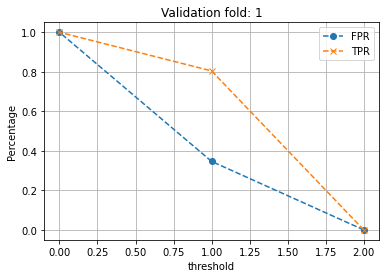

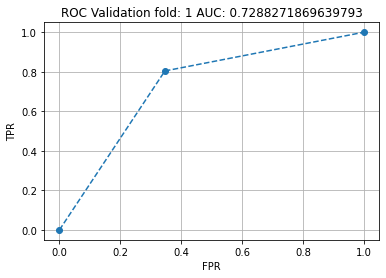

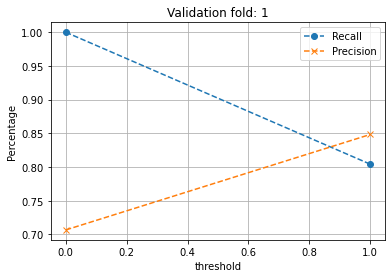

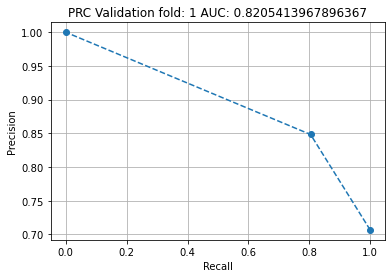

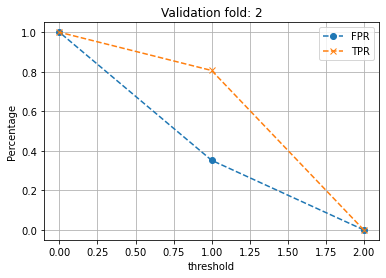

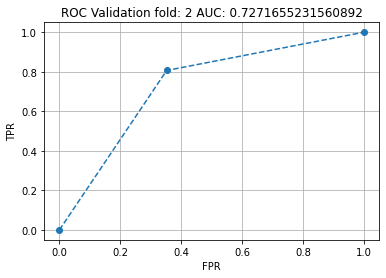

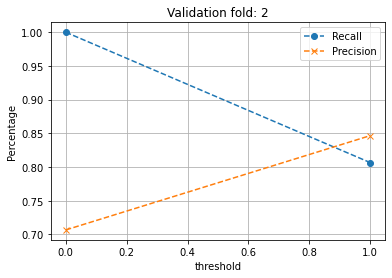

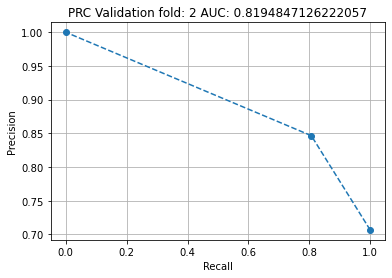

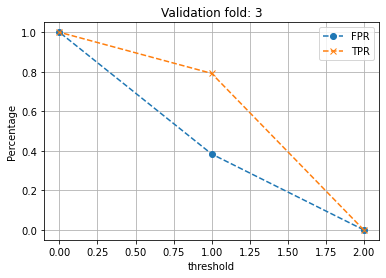

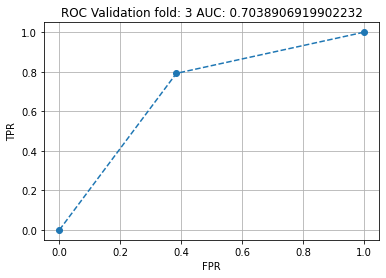

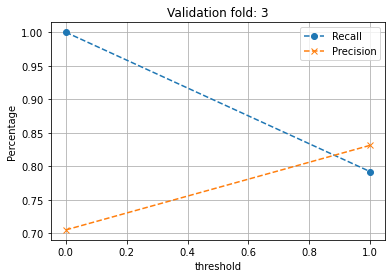

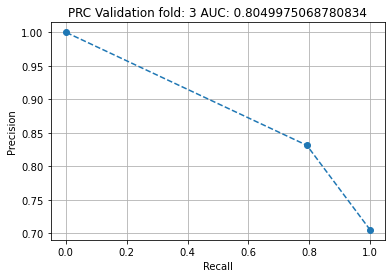

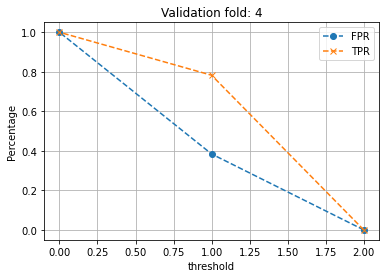

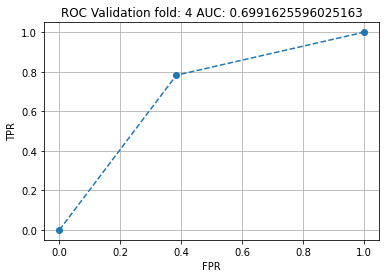

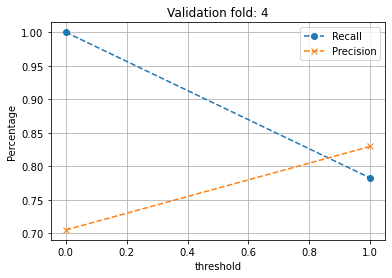

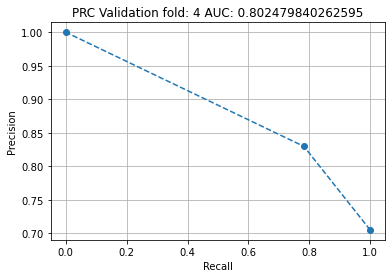

In [16]:
## Method - 1 : Standard Scalar
from sklearn import preprocessing
from statistics import mean
scaler = preprocessing.StandardScaler().fit(Xtraindata)
X_scaled = scaler.transform(Xtraindata)
acc_std,roc_std,pr_std = modeloutputmetrics(X_scaled,Ytraindata)
print('The mean of accuracies across all folds is: ' + str(np.mean(acc_std)*100) + '%')
print('The standard deviation of accuracies across all folds is: ' + str(np.std(acc_std)))
print('The mean of AUC-ROC across all folds is: ' + str(np.mean(roc_std)*100))
print('The standard deviation of AUC-ROC across all folds is: ' + str(np.std(roc_std)))
print('The mean of AUC-PR across all folds is: ' + str(np.mean(pr_std)*100))
print('The standard deviation of AUC-PR across all folds is: ' + str(np.std(pr_std)))

Fold  0 Accuracy: 0.74
Fold  0 AUC ROC: 0.7047062607204116
Fold  0 AUC PR: 0.8067452830188679
Fold  1 Accuracy: 0.7566666666666667
Fold  1 AUC ROC: 0.7264686963979416
Fold  1 AUC PR: 0.8192669025157233
Fold  2 Accuracy: 0.745
Fold  2 AUC ROC: 0.7148906518010292
Fold  2 AUC PR: 0.8127299082743216
Fold  3 Accuracy: 0.7416666666666667
Fold  3 AUC ROC: 0.7132868533878272
Fold  3 AUC PR: 0.8107177400967227
Fold  4 Accuracy: 0.7533333333333333
Fold  4 AUC ROC: 0.7248467363865849
Fold  4 AUC PR: 0.8172761134037194
The mean of accuracies across all folds is: 74.63333333333334%
The standard deviation of accuracies across all folds is: 0.009741092797468313
The mean of AUC-ROC across all folds is: 71.56978831491824
The standard deviation of AUC-ROC across all folds is: 0.011312830579916675
The mean of AUC-PR across all folds is: 81.27124777465427
The standard deviation of AUC-PR across all folds is: 0.0065863890302017385


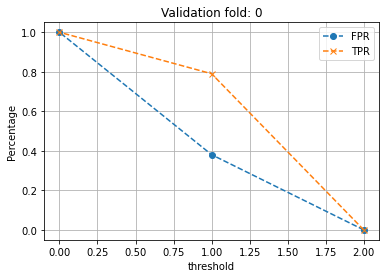

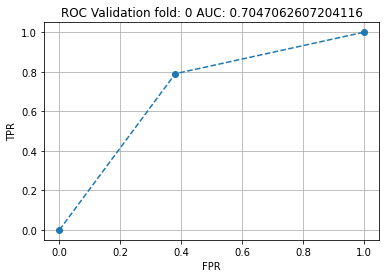

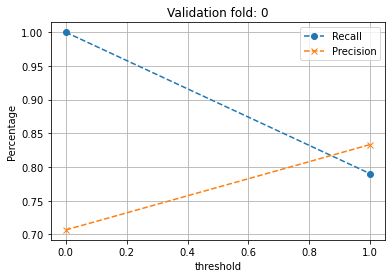

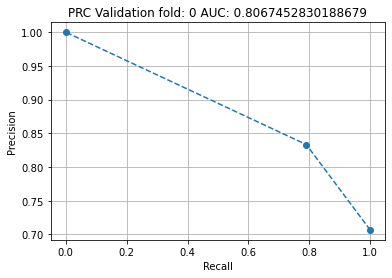

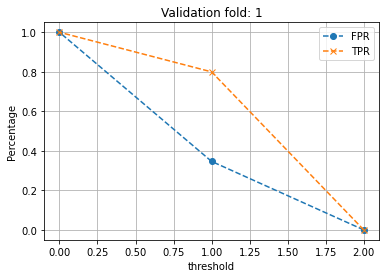

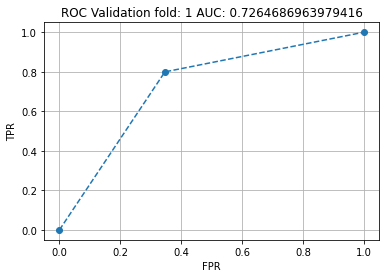

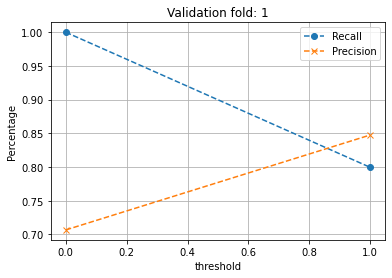

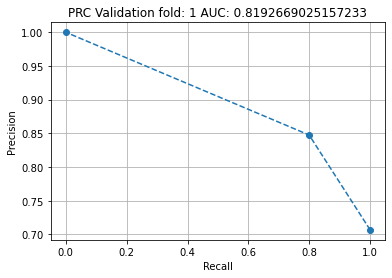

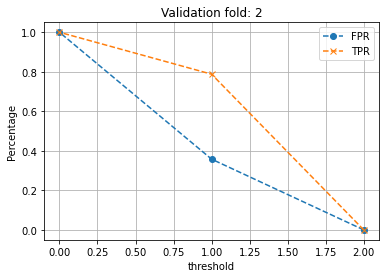

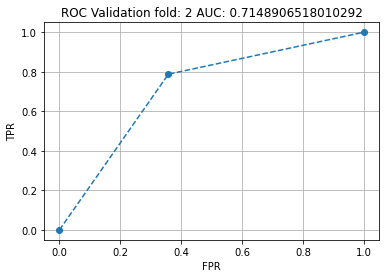

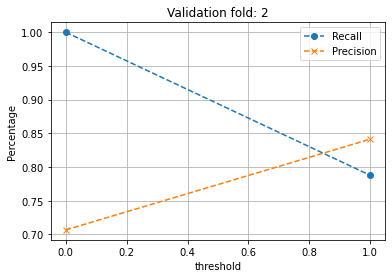

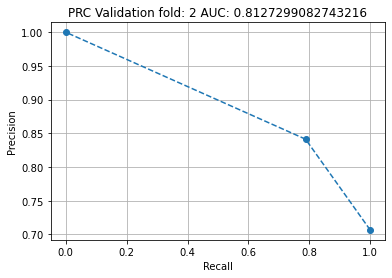

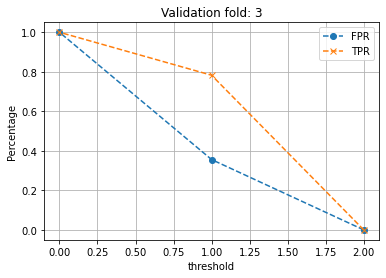

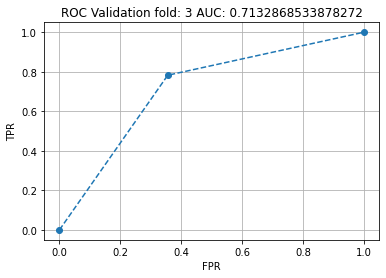

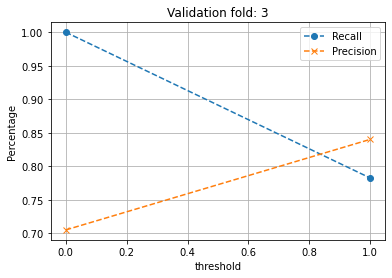

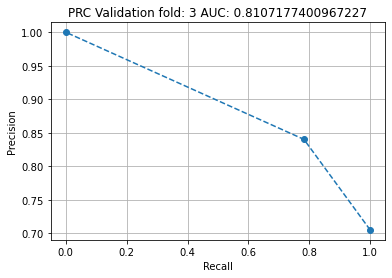

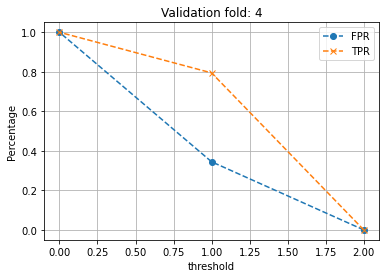

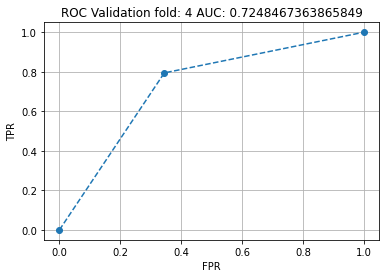

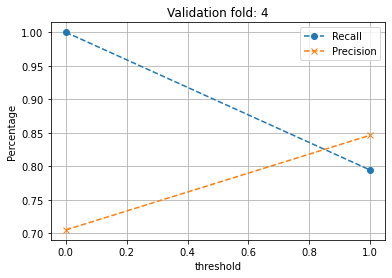

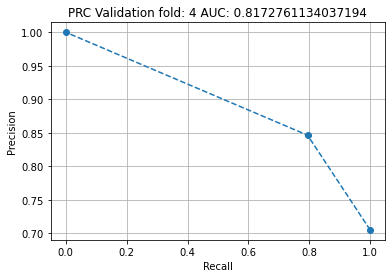

In [17]:
# Method 2 : Minmax scalar
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(Xtraindata)
acc_minmax,roc_minmax,pr_minmax = modeloutputmetrics(X_train_minmax,Ytraindata)
print('The mean of accuracies across all folds is: ' + str(np.mean(acc_minmax)*100) + '%')
print('The standard deviation of accuracies across all folds is: ' + str(np.std(acc_minmax)))
print('The mean of AUC-ROC across all folds is: ' + str(np.mean(roc_minmax)*100))
print('The standard deviation of AUC-ROC across all folds is: ' + str(np.std(roc_minmax)))
print('The mean of AUC-PR across all folds is: ' + str(np.mean(pr_minmax)*100))
print('The standard deviation of AUC-PR across all folds is: ' + str(np.std(pr_minmax)))

Fold  0 Accuracy: 0.74
Fold  0 AUC ROC: 0.7047062607204116
Fold  0 AUC PR: 0.8067452830188679
Fold  1 Accuracy: 0.7566666666666667
Fold  1 AUC ROC: 0.7264686963979416
Fold  1 AUC PR: 0.8192669025157233
Fold  2 Accuracy: 0.745
Fold  2 AUC ROC: 0.7148906518010292
Fold  2 AUC PR: 0.8127299082743216
Fold  3 Accuracy: 0.7416666666666667
Fold  3 AUC ROC: 0.7132868533878272
Fold  3 AUC PR: 0.8107177400967227
Fold  4 Accuracy: 0.7533333333333333
Fold  4 AUC ROC: 0.7248467363865849
Fold  4 AUC PR: 0.8172761134037194
The mean of accuracies across all folds is: 74.65833333333333%
The standard deviation of accuracies across all folds is: 0.009059602027069902
The mean of AUC-ROC across all folds is: 71.59833722965764
The standard deviation of AUC-ROC across all folds is: 0.010594961866515349
The mean of AUC-PR across all folds is: 81.28711556753748
The standard deviation of AUC-PR across all folds is: 0.00613831484470558


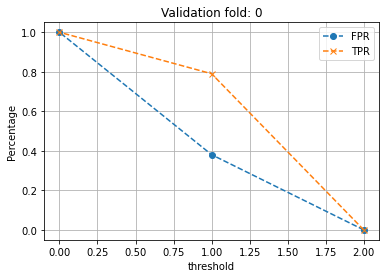

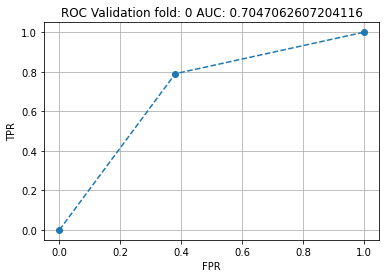

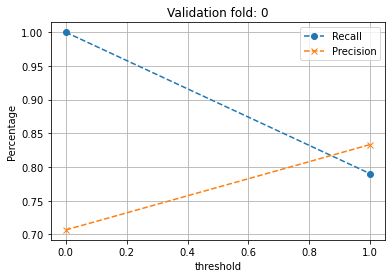

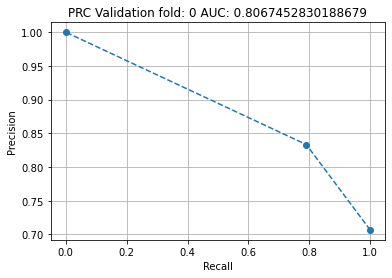

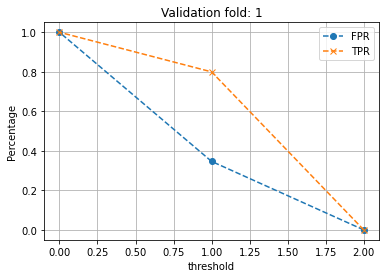

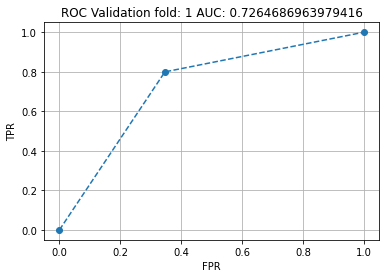

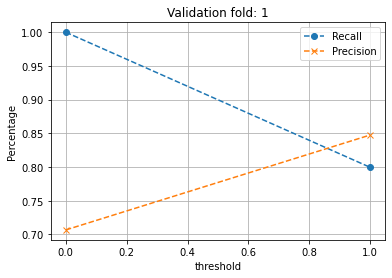

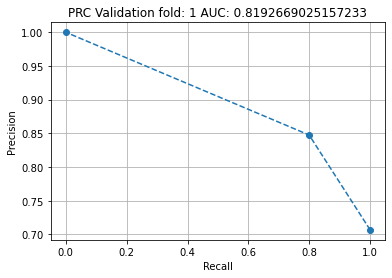

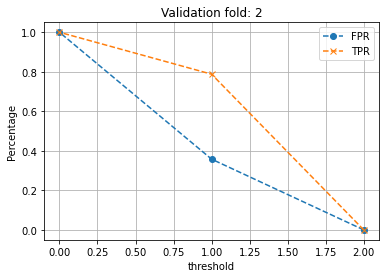

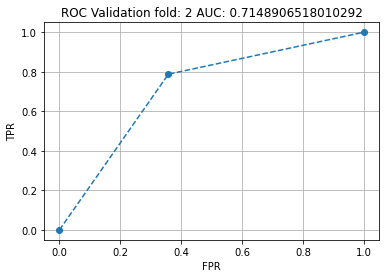

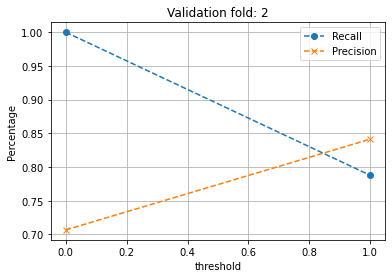

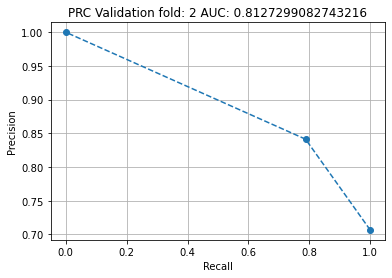

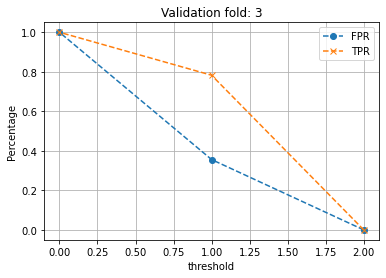

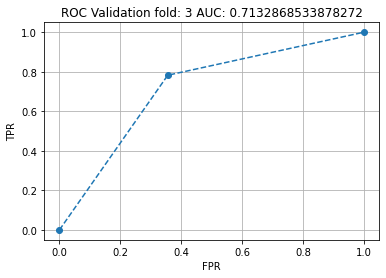

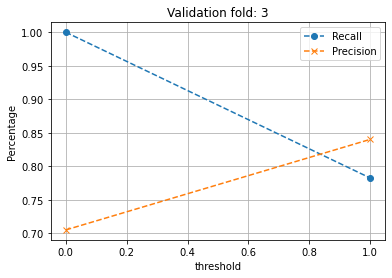

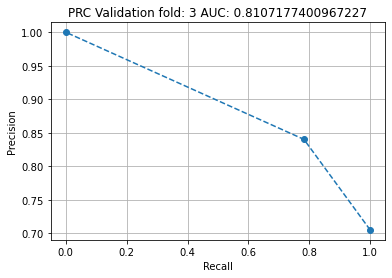

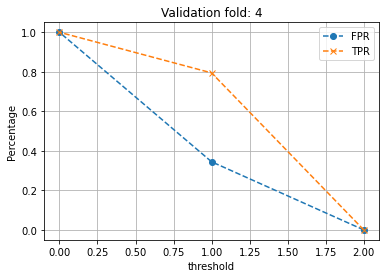

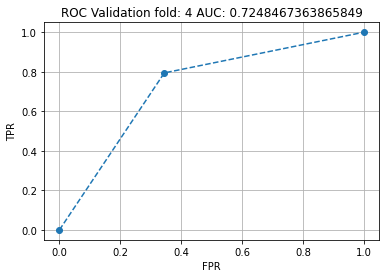

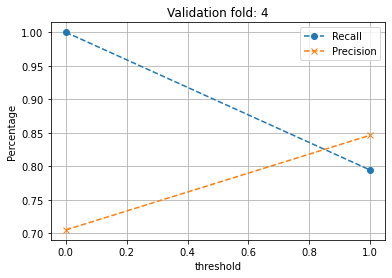

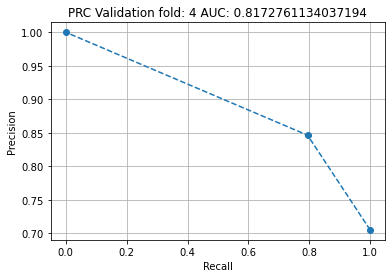

In [18]:
# Method 3: MaxAbs scalar
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(Xtraindata)
acc_maxabs,roc_maxabs,pr_maxabs = modeloutputmetrics(X_train_maxabs,Ytraindata)
print('The mean of accuracies across all folds is: ' + str(np.mean(acc_maxabs)*100) + '%')
print('The standard deviation of accuracies across all folds is: ' + str(np.std(acc_maxabs)))
print('The mean of AUC-ROC across all folds is: ' + str(np.mean(roc_maxabs)*100))
print('The standard deviation of AUC-ROC across all folds is: ' + str(np.std(roc_maxabs)))
print('The mean of AUC-PR across all folds is: ' + str(np.mean(pr_maxabs)*100))
print('The standard deviation of AUC-PR across all folds is: ' + str(np.std(pr_maxabs)))

Fold  0 Accuracy: 0.7416666666666667
Fold  0 AUC ROC: 0.6792988850771869
Fold  0 AUC PR: 0.7917848622858382
Fold  1 Accuracy: 0.7466666666666667
Fold  1 AUC ROC: 0.6894832761578044
Fold  1 AUC PR: 0.797407123007167
Fold  2 Accuracy: 0.7683333333333333
Fold  2 AUC ROC: 0.7147834476843911
Fold  2 AUC PR: 0.8113308234470078
Fold  3 Accuracy: 0.78
Fold  3 AUC ROC: 0.7256881836759226
Fold  3 AUC PR: 0.8161164098801663
Fold  4 Accuracy: 0.7733333333333333
Fold  4 AUC ROC: 0.7176743999679449
Fold  4 AUC PR: 0.8115803918371783
The mean of accuracies across all folds is: 74.96666666666667%
The standard deviation of accuracies across all folds is: 0.012220201853215578
The mean of AUC-ROC across all folds is: 71.38638255397912
The standard deviation of AUC-ROC across all folds is: 0.013083182843919872
The mean of AUC-PR across all folds is: 81.14257089585944
The standard deviation of AUC-PR across all folds is: 0.007482469437731997


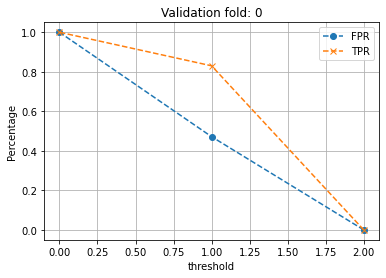

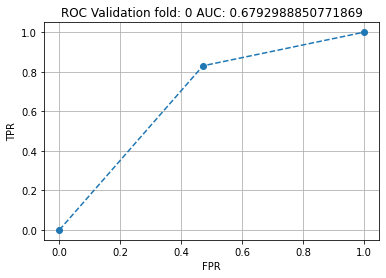

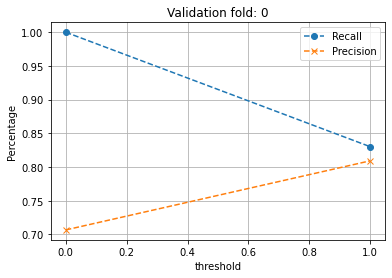

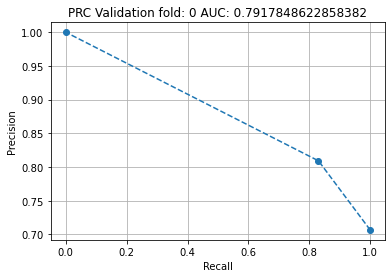

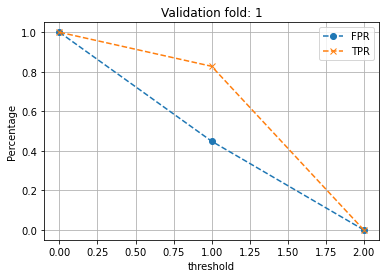

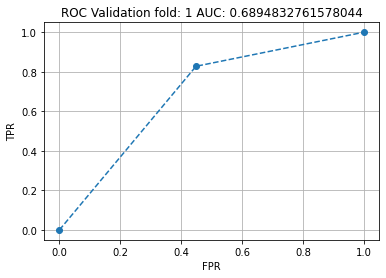

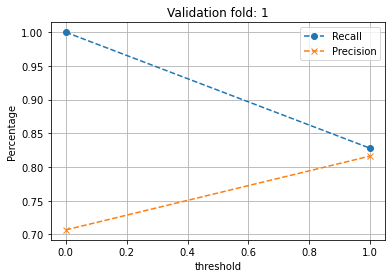

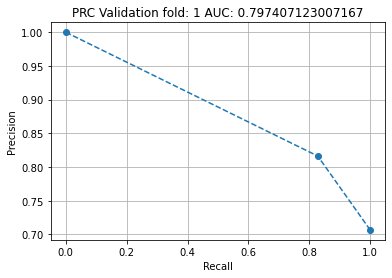

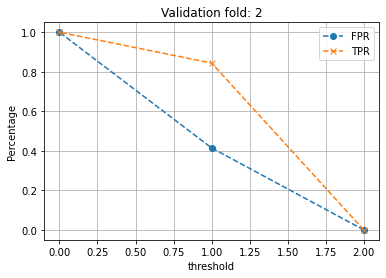

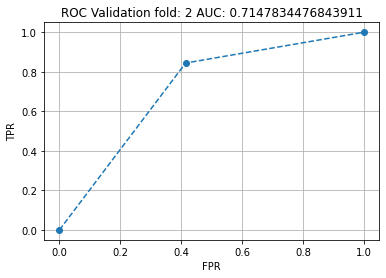

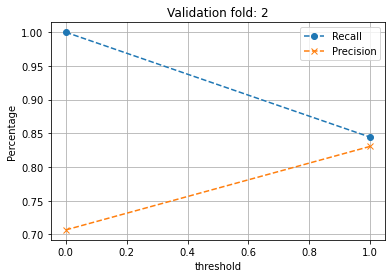

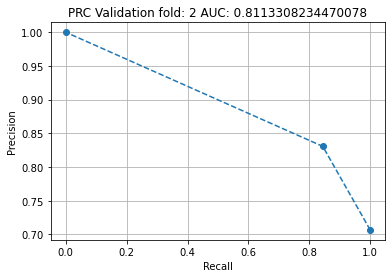

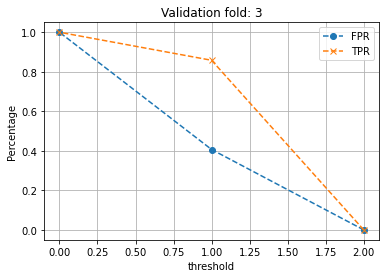

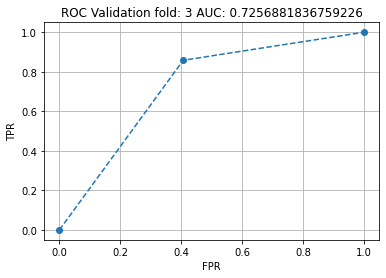

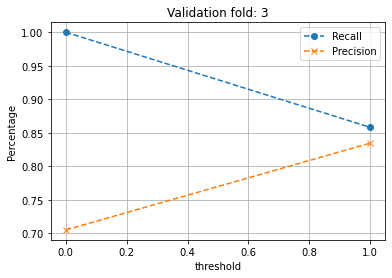

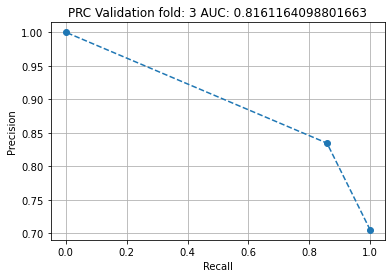

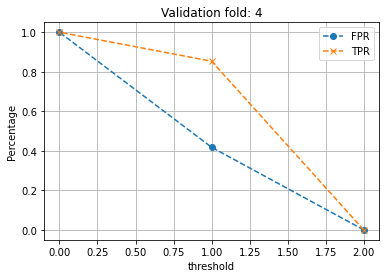

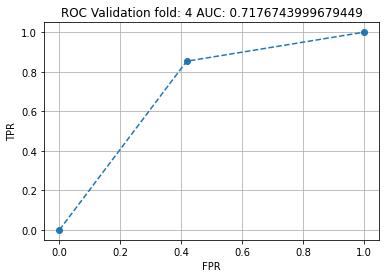

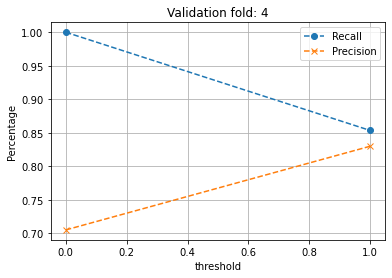

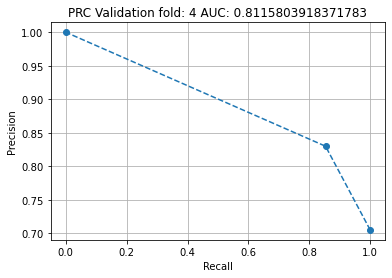

In [19]:
# Method 4: Normalizing
X_normalized = preprocessing.normalize(Xtraindata, norm='l2')
acc_nor,roc_nor,pr_nor = modeloutputmetrics(X_normalized,Ytraindata)
print('The mean of accuracies across all folds is: ' + str(np.mean(acc_nor)*100) + '%')
print('The standard deviation of accuracies across all folds is: ' + str(np.std(acc_nor)))
print('The mean of AUC-ROC across all folds is: ' + str(np.mean(roc_nor)*100))
print('The standard deviation of AUC-ROC across all folds is: ' + str(np.std(roc_nor)))
print('The mean of AUC-PR across all folds is: ' + str(np.mean(pr_nor)*100))
print('The standard deviation of AUC-PR across all folds is: ' + str(np.std(pr_nor)))

In [20]:
# There is not much effect in applying the preprocessing techniques on the data. The overall accuracies, AUC-ROC, AUC-PR 
# result in approximately similar values.

## iv. Use 5-fold cross-validation over training data to calculate the optimal value of k for the  k-Nearest neighbour classifier. What is the optimal value of k and what are the cross-validation accuracy, AUC-ROC and AUC-PR? Show code to demonstrate the results.

Fold  0 Accuracy: 0.7466666666666667
Fold  0 AUC ROC: 0.7533501286449399
Fold  0 AUC PR: 0.8436192554605726
Fold  1 Accuracy: 0.755
Fold  1 AUC ROC: 0.7918163057461407
Fold  1 AUC PR: 0.876665862886951
Fold  2 Accuracy: 0.7683333333333333
Fold  2 AUC ROC: 0.7892769082332762
Fold  2 AUC PR: 0.8728109955998397
Fold  3 Accuracy: 0.7333333333333333
Fold  3 AUC ROC: 0.7549985975878512
Fold  3 AUC PR: 0.8452982938241842
Fold  4 Accuracy: 0.7733333333333333
Fold  4 AUC ROC: 0.7994884534733074
Fold  4 AUC PR: 0.879962066976677


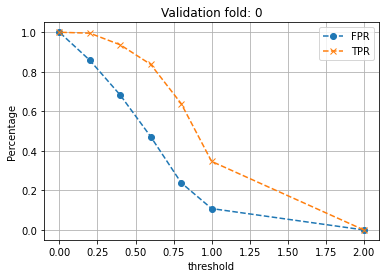

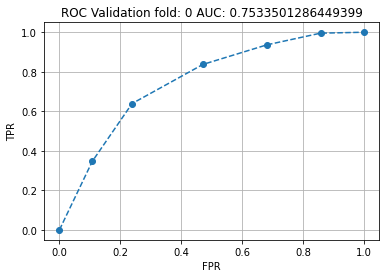

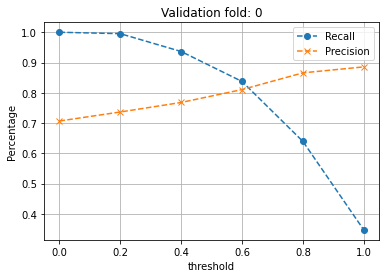

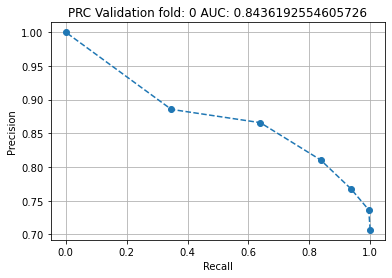

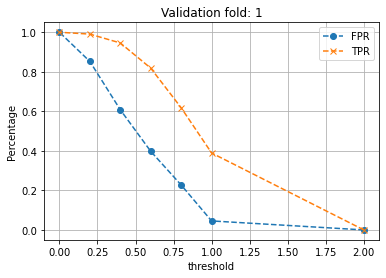

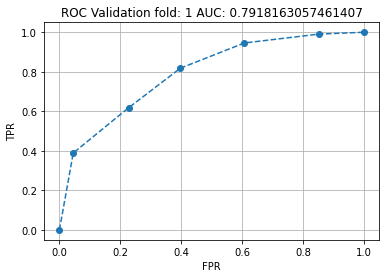

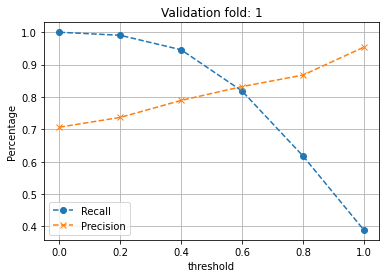

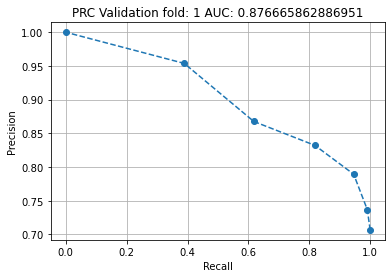

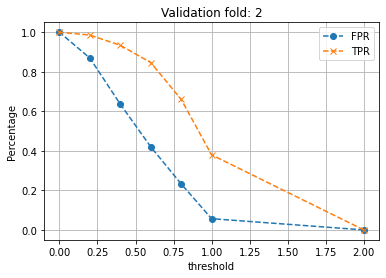

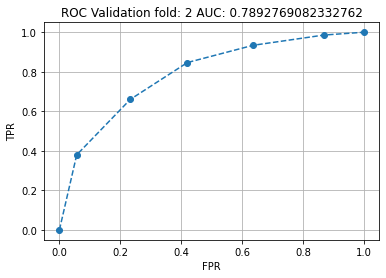

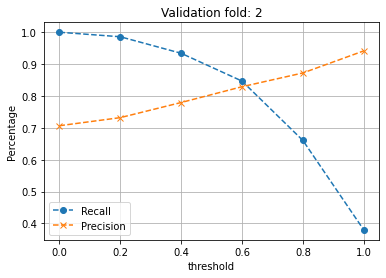

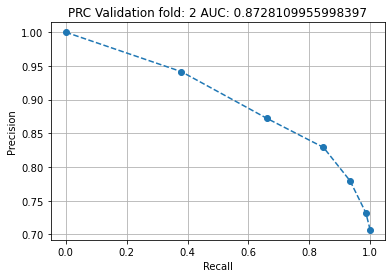

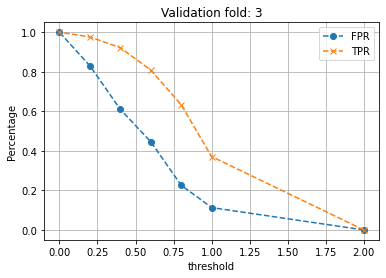

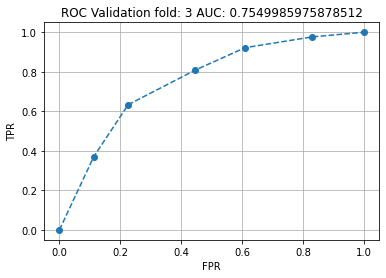

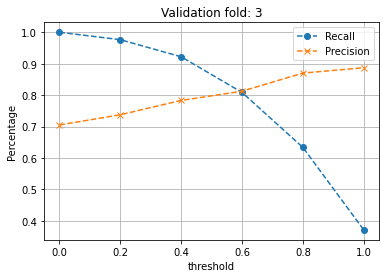

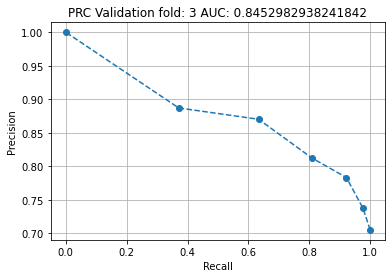

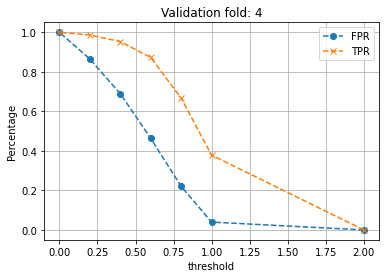

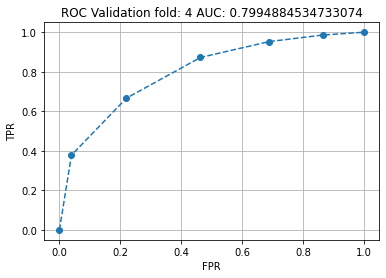

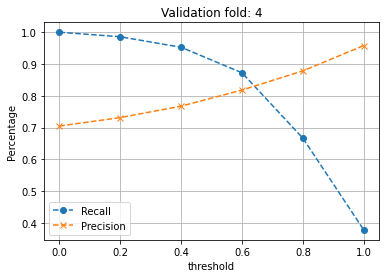

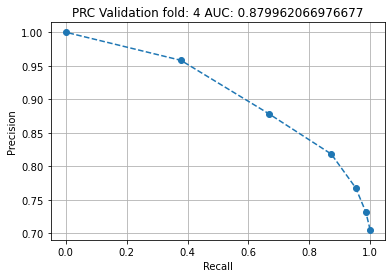

In [21]:
sknn_opt = KNeighborsClassifier(n_neighbors=5) #5 is the optimal value after comparing the scores for different values of k
acc_opt = []                                  # please see below for computation
roc_auc_opt = []
pr_auc_opt = []
for i, (train_index, test_index) in enumerate(skf.split(Xtraindata,Ytraindata)):
    X_train, X_val, y_train, y_val = Xtraindata[train_index], Xtraindata[test_index], Ytraindata[train_index], Ytraindata[test_index]
    sknn_opt.fit(X_train, y_train)
    score_opt = sknn_opt.score(X_val, y_val)
    acc_opt.append(score_opt)
    print('Fold ',i,'Accuracy:',score_opt)
    z = sknn_opt.predict_proba(X_val)
    roc_auc = plotROC(y_val,z[:, 1],pstr='Validation fold: ' + str(i))
    roc_auc_opt.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    pr_auc = plotPRC(y_val,z[:, 1],pstr='Validation fold: ' + str(i))
    pr_auc_opt.append(pr_auc)
    print('Fold ',i,'AUC PR:',pr_auc)

In [22]:
# search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score
# range of k possible values
k_range = range(1, 50)
# empty list to store scores
k_scores = []

# loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=skf, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)

[0.735, 0.675, 0.7591666666666667, 0.7220833333333333, 0.7595833333333333, 0.7308333333333334, 0.7566666666666666, 0.74375, 0.7545833333333333, 0.7408333333333333, 0.7537499999999999, 0.7537499999999999, 0.75875, 0.7504166666666666, 0.7554166666666667, 0.7533333333333333, 0.7541666666666667, 0.7445833333333333, 0.7445833333333334, 0.7445833333333334, 0.7454166666666667, 0.7466666666666667, 0.7454166666666667, 0.7425, 0.7408333333333335, 0.7441666666666668, 0.74, 0.7404166666666667, 0.7345833333333334, 0.7358333333333332, 0.7329166666666665, 0.7366666666666667, 0.7337499999999999, 0.7370833333333333, 0.7279166666666665, 0.7308333333333333, 0.7233333333333334, 0.725, 0.7224999999999999, 0.7233333333333334, 0.7220833333333333, 0.7245833333333334, 0.7183333333333333, 0.7208333333333333, 0.7158333333333333, 0.7150000000000001, 0.7158333333333333, 0.7162499999999999, 0.7133333333333333]


Text(0, 0.5, 'Cross-validated accuracy')

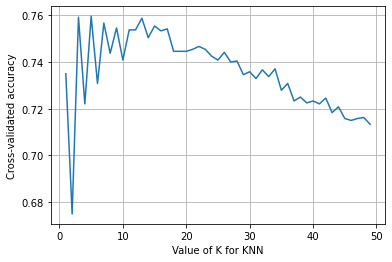

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.grid()
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [24]:
# From the above graphs and calculation of scores using cross_val_score function we get:
# k = 5 when applied directly on the training dataset

print('The mean of accuracies across all folds is: ' + str(np.mean(acc_opt)*100) + '%')
print('The mean of AUC-ROC across all folds is: ' + str(np.mean(roc_auc_opt)))
print('The mean of AUC-PR across all folds is: ' + str(np.mean(pr_auc_opt)))

The mean of accuracies across all folds is: 75.53333333333335%
The mean of AUC-ROC across all folds is: 0.7777860787371031
The mean of AUC-PR across all folds is: 0.8636712949496449


## Question No. 3: CV
## Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: k-nearest neighbour, Perceptron, Naïve Bayes Classifier, Logistic regression, Linear SVM and Kernelized SVM. Be sure to tune the hyperparameters of each classifier type (k for k-nearest neighbour, C and kernel type and parameters for SVM and so on). Report the cross validation results (mean and standard deviation of accuracy, AUC-ROC and AUC-PR across fold) of your best model. You may look into grid search as well as ways of pre-processing data. Show code to demonstrate the results. Also show the comparison of these classifiers using a single table.

In [25]:
def ROC(y,z,pstr=''):
    fpr,tpr,tt=roc_curve(y,z)
    roc_auc = auc(fpr,tpr)
    return roc_auc

def PRC(y,z,pstr=''):
    P, R, tt = precision_recall_curve(y,z)
    pr_auc = average_precision_score(y,z)
    return pr_auc

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
scaler_bst = preprocessing.StandardScaler().fit(Xtraindata)
X_scaled_bst = scaler_bst.transform(Xtraindata)
sknn_bst = KNeighborsClassifier(n_neighbors=5)
pr = Perceptron(max_iter=100, tol=0.001)
lr=LogisticRegression(C = 0.0018329807108324356,max_iter = 1000,penalty = 'l2')
gnb = GaussianNB()
svc_linear = SVC(C = 2, kernel='linear')
svc_kernel = SVC(C = 2, kernel='rbf', gamma='scale')
acc_knn, acc_pr, acc_lr, acc_gnb, acc_linsvc, acc_kersvc = [],[],[],[],[],[]
roc_knn, roc_pr, roc_lr, roc_gnb, roc_linsvc, roc_kersvc = [],[],[],[],[],[]
pr_knn, pr_perc, pr_lr, pr_gnb, pr_linsvc, pr_kersvc = [],[],[],[],[],[]

for i, (train_index, test_index) in enumerate(skf.split(X_scaled_bst,Ytraindata)):
    Xtr_bst, Xv_bst, ytr_bst, yv_bst = X_scaled_bst[train_index], X_scaled_bst[test_index], Ytraindata[train_index], Ytraindata[test_index]
    #############################################################################################
    # KNN Classifier
    sknn_bst.fit(Xtr_bst, ytr_bst)
    acc_knn.append(sknn_bst.score(Xv_bst, yv_bst))
    z_knn = sknn_bst.predict_proba(Xv_bst)
    #roc_auc = ROC(yv_bst,z_knn[:, 1],pstr='Validation fold: ' + str(i))
    roc_knn.append(ROC(yv_bst,z_knn[:, 1],pstr='Validation fold: ' + str(i)))
    #pr_ = PRC(yv_bst,z_knn[:, 1],pstr='Validation fold: ' + str(i))
    pr_knn.append(PRC(yv_bst,z_knn[:, 1],pstr='Validation fold: ' + str(i)))
    #############################################################################################
    # Perceptron
    pr.fit(Xtr_bst, ytr_bst)
    acc_pr.append(pr.score(Xv_bst, yv_bst))
    z_pr = pr.decision_function(Xv_bst)
    roc_pr.append(ROC(yv_bst,z_pr,pstr='Validation fold: ' + str(i)))
    pr_perc.append(PRC(yv_bst,z_pr,pstr='Validation fold: ' + str(i)))
    #############################################################################################
    # Logistic Regression
    lr.fit(Xtr_bst, ytr_bst)
    acc_lr.append(lr.score(Xv_bst, yv_bst))
    z_lr = lr.decision_function(Xv_bst)
    roc_lr.append(ROC(yv_bst,z_lr,pstr='Validation fold: ' + str(i)))
    pr_lr.append(PRC(yv_bst,z_lr,pstr='Validation fold: ' + str(i)))
    #############################################################################################
    # Guassian Naive Bayes
    gnb.fit(Xtr_bst, ytr_bst)
    acc_gnb.append(gnb.score(Xv_bst, yv_bst))
    z_gnb = gnb.predict_proba(Xv_bst)
    roc_gnb.append(ROC(yv_bst,z_gnb[:, 1],pstr='Validation fold: ' + str(i)))
    pr_gnb.append(PRC(yv_bst,z_gnb[:, 1],pstr='Validation fold: ' + str(i)))
    #############################################################################################
    # Linear SVM
    svc_linear.fit(Xtr_bst, ytr_bst)
    acc_linsvc.append(svc_linear.score(Xv_bst, yv_bst))
    z_lin = svc_linear.decision_function(Xv_bst)
    roc_linsvc.append(ROC(yv_bst,z_lin,pstr='Validation fold: ' + str(i)))
    pr_linsvc.append(PRC(yv_bst,z_lin,pstr='Validation fold: ' + str(i)))
    #############################################################################################
    # Kernel SVM
    svc_kernel.fit(Xtr_bst, ytr_bst)
    acc_kersvc.append(svc_kernel.score(Xv_bst, yv_bst))
    z_ker = svc_kernel.decision_function(Xv_bst)
    roc_kersvc.append(ROC(yv_bst,z_ker,pstr='Validation fold: ' + str(i)))
    pr_kersvc.append(PRC(yv_bst,z_ker,pstr='Validation fold: ' + str(i)))
    #############################################################################################
    
    
print("KNN Classifier:")
print("Mean accuracy for KNN: ", np.mean(acc_knn))
print("Standard deviation of accuracy for KNN: ", np.std(acc_knn))
print("Mean AUC-ROC for KNN: ", np.mean(roc_knn))
print("Standard deviation of AUC-ROC for KNN: ", np.std(roc_knn))
print("Mean AUC-PR for KNN: ", np.mean(pr_knn))
print("Standard deviation of AUC-PR for KNN: ", np.std(pr_knn))
print("*****************************************************************************************")
print("Perceptron:")
print("Mean accuracy for Perceptron: ", np.mean(acc_pr))
print("Standard deviation of accuracy for Perceptron: ", np.std(acc_pr))
print("Mean AUC-ROC for Perceptron: ", np.mean(roc_pr))
print("Standard deviation of AUC-ROC for Perceptron: ", np.std(roc_pr))
print("Mean AUC-PR for Perceptron: ", np.mean(pr_perc))
print("Standard deviation of AUC-PR for Perceptron: ", np.std(pr_perc))
print("*****************************************************************************************")
print("Logistic Regression:")
print("Mean accuracy for Logistic Regression: ", np.mean(acc_lr))
print("Standard deviation of accuracy for Logistic Regression: ", np.std(acc_lr))
print("Mean AUC-ROC for Logistic Regression: ", np.mean(roc_lr))
print("Standard deviation of AUC-ROC for Logistic Regression: ", np.std(roc_lr))
print("Mean AUC-PR for Logistic Regression: ", np.mean(pr_lr))
print("Standard deviation of AUC-PR for Logistic Regression: ", np.std(pr_lr))
print("*****************************************************************************************")
print("Guassian Naive Bayes:")
print("Mean accuracy for Guassian Naive Bayes: ", np.mean(acc_gnb))
print("Standard deviation of accuracy for Guassian Naive Bayes: ", np.std(acc_gnb))
print("Mean AUC-ROC for Guassian Naive Bayes: ", np.mean(roc_gnb))
print("Standard deviation of AUC-ROC for Guassian Naive Bayes: ", np.std(roc_gnb))
print("Mean AUC-PR for Guassian Naive Bayes: ", np.mean(pr_gnb))
print("Standard deviation of AUC-PR for Guassian Naive Bayes: ", np.std(pr_gnb))
print("*****************************************************************************************")
print("Linear SVM:")
print("Mean accuracy for Linear SVM: ", np.mean(acc_linsvc))
print("Standard deviation of accuracy for Linear SVM: ", np.std(acc_linsvc))
print("Mean AUC-ROC for Linear SVM: ", np.mean(roc_linsvc))
print("Standard deviation of AUC-ROC for Linear SVM: ", np.std(roc_linsvc))
print("Mean AUC-PR for Linear SVM: ", np.mean(pr_linsvc))
print("Standard deviation of AUC-PR for Linear SVM: ", np.std(pr_linsvc))
print("*****************************************************************************************")
print("Kernel SVM:")
print("Mean accuracy for Kernel SVM: ", np.mean(acc_kersvc))
print("Standard deviation of accuracy for Kernel SVM: ", np.std(acc_kersvc))
print("Mean AUC-ROC for Kernel SVM: ", np.mean(roc_kersvc))
print("Standard deviation of AUC-ROC for Kernel SVM: ", np.std(roc_kersvc))
print("Mean AUC-PR for Kernel SVM: ", np.mean(pr_kersvc))
print("Standard deviation of AUC-PR for Kernel SVM: ", np.std(pr_kersvc))
print("*****************************************************************************************")

KNN Classifier:
Mean accuracy for KNN:  0.749
Standard deviation of accuracy for KNN:  0.012498888839501815
Mean AUC-ROC for KNN:  0.7657830064587877
Standard deviation of AUC-ROC for KNN:  0.015104701751232073
Mean AUC-PR for KNN:  0.8562491613029628
Standard deviation of AUC-PR for KNN:  0.013380456876220503
*****************************************************************************************
Perceptron:
Mean accuracy for Perceptron:  0.6086666666666666
Standard deviation of accuracy for Perceptron:  0.016034684627740936
Mean AUC-ROC for Perceptron:  0.551436005234893
Standard deviation of AUC-ROC for Perceptron:  0.01524601295276495
Mean AUC-PR for Perceptron:  0.746633762463589
Standard deviation of AUC-PR for Perceptron:  0.014066789628509786
*****************************************************************************************
Logistic Regression:
Mean accuracy for Logistic Regression:  0.6993333333333334
Standard deviation of accuracy for Logistic Regression:  0.007571877

|Model Name|Mean Accuracy|Standard Deviation of Accuracy|Mean AUC-ROC|Standard Deviation of AUC-ROC|Mean AUC-PR|Standard Deviation of AUC-PR|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|KNN |74.9%|0.012498|0.765783|0.015104|0.85624|0.013380|
|Perceptron|60.867%|0.0160346|0.55143|0.0152460|0.7466337|0.0140667|
|Logistic Regression|69.93%|0.007571|0.586847|0.0266787|0.766369|0.019387|
|Guassian Naive Bayes|55.23%|0.036947|0.568624|0.039538|0.765334|0.035255|
|Linear SVM|60.96%|0.019843|0.541559|0.023791|0.73556|0.016602|
|Kernel SVM|75.4%|0.0116714|0.757238|0.0210974|0.866081|0.011884|

## Using GridSearchCV to tune the hyperparameters :

In [27]:
# knn_search = KNeighborsClassifier()
# k_range = list(range(1, 50))
# param_grid = dict(n_neighbors = k_range)
# gridclf=GridSearchCV(knn_search,param_grid= param_grid,cv=skf,verbose=True, n_jobs=-1)
# gridclf.fit(Xtr_bst,ytr_bst)
# print(gridclf.best_params_)
# print(gridclf.best_score_)

In [28]:
# from sklearn.linear_model import Perceptron
# pr = Perceptron()
# grid = dict() 
# grid['eta0'] = [0.001, 0.01, 0.1, 1.0] 
# grid['max_iter'] = [1,10,100,1000]
# gridsearch = GridSearchCV(pr, param_grid = grid, cv = skf, n_jobs = -1, scoring = 'accuracy')
# search = gridsearch.fit(Xtr_bst, ytr_bst)
# print(search.best_params_)
# print(search.best_score_)

In [29]:
# from sklearn.linear_model import LogisticRegression

# param_grid = [ 
# {'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-4, 4, 20),
#     'max_iter' : [1000]
# }
#  ]
# logreg=LogisticRegression()
# clf_LR=GridSearchCV(logreg,param_grid= param_grid,cv=skf,verbose=True, n_jobs=-1,scoring = 'accuracy')
# clf_LR.fit(Xtr_bst,ytr_bst)
# print(clf_LR.best_params_)
# print(clf_LR.best_score_)

In [30]:
# #Kernalized SVM
# from sklearn.svm import SVC
# param_grid = {'C': [0.1,1,2,3,4,5,6,7,8,9,10], 'gamma': ['auto,'scale],'kernel': ['rbf', 'poly', 'sigmoid']}
# gridsearch = GridSearchCV(SVC(), param_grid = param_grid, cv = skf, n_jobs = -1, scoring = 'accuracy')
# gridsearch.fit(Xtr_bst,ytr_bst)
# print(gridsearch.best_params_)
# print(gridsearch.best_score_)

## Question No. 4 :PCA
## i. Reduce the number of dimensions of the data using PCA to 2 and plot a scatter plot of the training data. What are your observations about the data based on data?

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_train_minmax)

In [33]:
print('New Dataset size after transformation : ', principalComponents.shape)

New Dataset size after transformation :  (3000, 2)


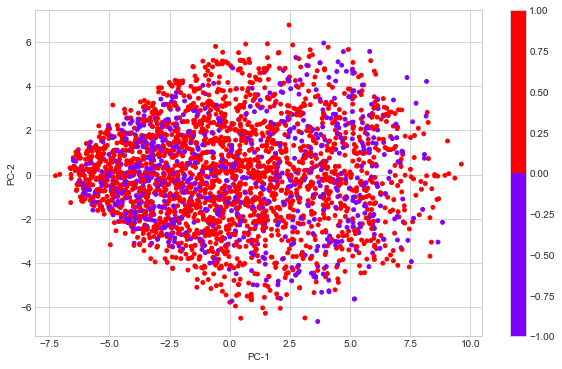

In [34]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('rainbow', 2)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s = 15,
cmap = c_map , c = Ytraindata)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [35]:
# It is obvious from the above scatter plot that the data cannot be classified just with two principal components, 
# We would need more number of dimensions to address the classfication problem, moreover the explained variance 
# doesn't add up to much. An ideal case would be a 95% variance which ensures we can eliminate remaining unwanted 
# components/features safely without disrupting the performance of the model.

## ii. Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set

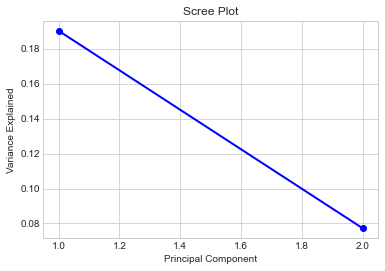

In [36]:
PC_values = np.arange(pca2.n_components_) + 1
plt.plot(PC_values, pca2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

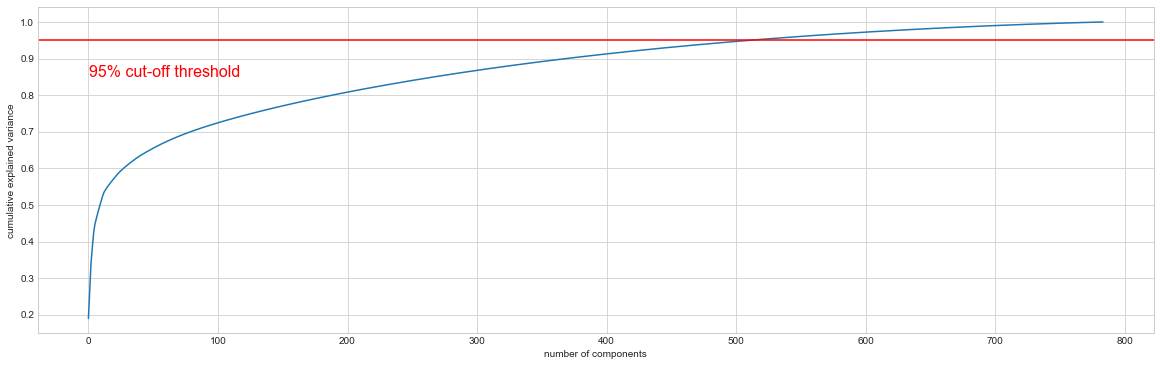

In [37]:
#Plotting a graph to identify the number of components needed - 
# Explained variance vs number of components required for 95% variance
pca = PCA().fit(X_train_minmax)

%matplotlib inline

plt.rcParams["figure.figsize"] = (20,6)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [38]:
# From the graph it approximately takes 500-520 components to explain 95% variance
# It can be verified with the below code - Which gives a value of 512
pca_var = PCA(.95)
pca_var.fit(X_train_minmax)
pca_var.n_components_

512

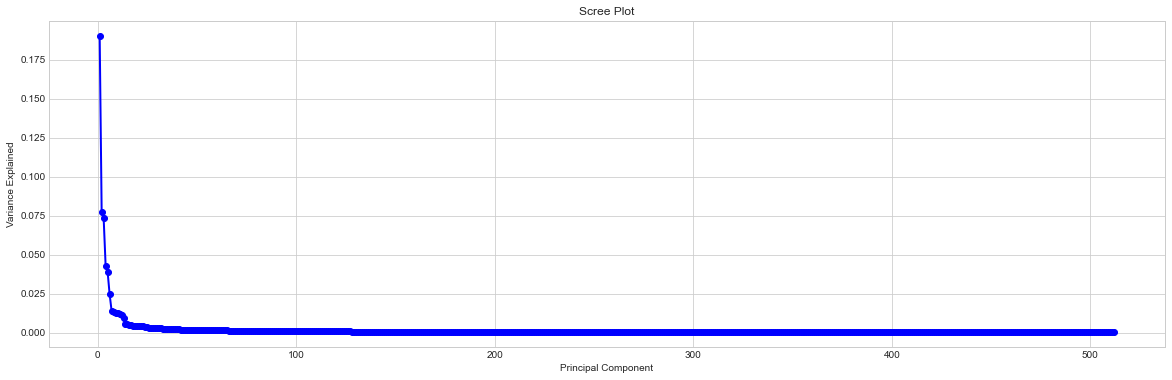

In [39]:
#Plotting the scree graph after getting the required number of components
PC_values = np.arange(pca_var.n_components_) + 1
plt.plot(PC_values, pca_var.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## iii. Reduce the number of dimensions of the data using PCA and perform classification. What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!

In [40]:
skf_opt = StratifiedKFold(n_splits=5)
acc_kersvc_opt,roc_kersvc_opt,pr_kersvc_opt = [],[],[]
pca_opt = PCA(.95)
svc_kernel_opt = SVC(C = 2, kernel='rbf', gamma='scale')
for i, (train_index, test_index) in enumerate(skf_opt.split(X_train_minmax,Ytraindata)):
    Xtr_bst_, Xv_bst_, ytr_bst_, yv_bst_ = X_normalized[train_index], X_normalized[test_index], Ytraindata[train_index], Ytraindata[test_index]
    pca_opt.fit(Xtr_bst_)
    Xtr_bst_ = pca_opt.transform(Xtr_bst_)
    Xv_bst_ = pca_opt.transform(Xv_bst_)
    svc_kernel_opt.fit(Xtr_bst_, ytr_bst_)
    acc_kersvc_opt.append(svc_kernel_opt.score(Xv_bst_, yv_bst_))
    z_ker_opt = svc_kernel_opt.decision_function(Xv_bst_)
    roc_kersvc_opt.append(ROC(yv_bst_,z_ker_opt,pstr='Validation fold: ' + str(i)))
    pr_kersvc_opt.append(PRC(yv_bst_,z_ker_opt,pstr='Validation fold: ' + str(i)))

print("Kernel SVM:")
print("Mean accuracy for Kernel SVM: ", np.mean(acc_kersvc_opt))
print("Standard deviation of accuracy for Kernel SVM: ", np.std(acc_kersvc_opt))
print("Mean AUC-ROC for Kernel SVM: ", np.mean(roc_kersvc_opt))
print("Standard deviation of AUC-ROC for Kernel SVM: ", np.std(roc_kersvc_opt))
print("Mean AUC-PR for Kernel SVM: ", np.mean(pr_kersvc_opt))
print("Standard deviation of AUC-PR for Kernel SVM: ", np.std(pr_kersvc_opt))

Kernel SVM:
Mean accuracy for Kernel SVM:  0.7803333333333333
Standard deviation of accuracy for Kernel SVM:  0.01403962645910179
Mean AUC-ROC for Kernel SVM:  0.7783209261868664
Standard deviation of AUC-ROC for Kernel SVM:  0.022149435774016245
Mean AUC-PR for Kernel SVM:  0.8703002522920936
Standard deviation of AUC-PR for Kernel SVM:  0.01637917789473955


In [41]:
# After applying PCA i.e reducing the dimensions to 512, the accuracy, AUC-PR, AUC-ROC is greater than the values from before  
# as in Question 3
# So we can safely eliminate the number of features and reduce it to 512 to represent our data.

## Question No. 5
## Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any tools at your disposal. However, no external data sources may be used. Describe your pipeline and report your results over the test data set. (You are required to submit your prediction file together with the assignment in a zip folder). Your prediction file should be a single column file containing the prediction score of the corresponding example in Xtest (be sure to have the same order!)

In [42]:
# The pipeline is created with scaling the data using MinMaxScaler, applying PCA with 95% variance and then classifying 
# the data using Kernel SVM. The previous code cell gives the count of positive labels and negative labels.

In [43]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scalar',preprocessing.MinMaxScaler()),('pca', PCA(0.95)), ('kernelSVM', SVC(C = 2, kernel='rbf', gamma='scale'))])

In [45]:
pipeline.fit(Xtraindata,Ytraindata)
y_pred = pipeline.decision_function(Xtestdata)

In [46]:
print(y_pred)

[ 1.00370015  0.18166038 -0.24152673 ...  1.0446475   0.55655351
  1.37292349]


In [47]:
len(y_pred)

3000

In [48]:
f = open("u2149607.csv","w+")

for i in range(len(y_pred)):
    f.write("%s\n" %(y_pred[i]))
f.close()

In [ ]:
# I have made use of different preprocessing techniques like MinMAxscalar, MaxbsScalar, Normalize, StandardScalar at each stage
# of the assignment to see variations in the results. Most importantly PCA works well only when there is some preprocessing
# techniques applied on the data. S

In [49]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scalar',preprocessing.MinMaxScaler()),('pca', PCA(0.95)), ('KNN', KNeighborsClassifier(n_neighbors=5))])

In [50]:
pipeline.fit(Xtraindata,Ytraindata)
y_pred = pipeline.predict_proba(Xtestdata)

In [51]:
f = open("u2149607.csv","w+")

for i in range(len(y_pred)):
    f.write("%s\n" %(y_pred[i]))
f.close()

In [52]:
z = pipeline.predict(Xtestdata)

In [53]:
z.shape

(3000,)